# Matrices, Part 2
This chapter begins with matrix norms and matrix spaces. Matrix norms are essentially extended vector norms, and matrix spaces are essentially extended vector subspaces.

Other concepts like linear independence, rank and determinant will be introduced as well.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Matrix Norms
There is no 'the' matrix norm; there are many norms that can be computed from a matrix. Matrix norms are somewhat similar to vector norms in that each norm provides one number that characterizes a matrix, and that norm is indicated using double vertical lines, as in the norm of matrix $\mathbf{A}$ is indicated as $\lVert\mathbf{A}\rVert$.

but different matrix norms have different meanings. The matrix norms can be broadly divided into two families: element-wise and induced. <br>
Element-wise norms are computed based on the individual elements of the matrix, and thus these norms can be interpreted to reflect the magnitudes of the elements in the matrix.

Induced norms can be interpreted in the following way: one of the functions of a matrix is to encode a transformation of a vector; the induced norm of a matrix is a measure of how much that transformation scales that vector.

This chapter will deal with element-wise norms-

We'll begin with the Euclidean norm, which is actually a direct extension of the vector norm to matrices. It is also called the *Frobenius norm*, and is computed as the square root of the sum of all matrix elements squared.

$\lVert\mathbf{A}\rVert _F= \sqrt{\Sigma_{i=1}^M\Sigma_{j=1}^N a_{i,j}^2}$

The indices $i$ and $j$ correspond to the $M$ rows and $N$ columns. Also note the subscripted $F$.<br>
The Forbenius norm is also called the $\ell 2$ norm. And the $\ell 2$ norm gets its name from the general formula for element-wise $p$-norms.

$\lVert\mathbf{A}\rVert _p = \Biggl ( \Sigma_{i=1}^M \Sigma_{j=1}^N |a_{i,j}|^p \Biggr )^\frac{1}{p}$

Matrix norms have several applications in ML and statistical analysis. One of the important applications is regularization, which aims to improve model fitting and increase the generalization of models to unseen data. <br>

The basic idea of generalization is to add a matrix norm as a cost function to a minimization algorithm. That norm will help prevent model parameters from becoming too large ($\ell 2$ regularization, also called *ridge regression*) or encouraging sparse solutions ($\ell 1$ regularization, also called *lasso regression*). 

Another application of the Frobenius norm is computing a measure of 'matrix distance'. The distance between a matrix and itself is 0, and the distance between two distinct matrices increases as the numerical values in those matrices become increasingly dissimilar. Frobenius matrix distance is computed simply by replacing matrix $\mathbf{A}$ with matrix $\mathbf{C} =\mathbf{A}-\mathbf{B}$.

### Matrix Trace and Frobenius Norm
The *trace* of a matrix is the sum of its diagonal elements, indicated as $tr(\mathbf{A})$, and exists only for square matrices. Both of the following matrices have the same trace:

$\begin{bmatrix}4&5&6\\0&1&4\\9&9&9\end{bmatrix},\begin{bmatrix}0&0&0\\0&8&0\\1&2&6\end{bmatrix}$

Trace has some interesting properties. 
- The trace of a matrix equals the sum of its eigenvalues and therefore it is a measure of the 'volume' of its eigenspace.

- Many properties of the trace are less relevant for data science applications, but here is one interesting exception:<br>
  $\lVert\mathbf{A}\rVert _F=\sqrt{\Sigma_{i=1}^M\Sigma_{j=1}^N a_{i,j}^2} = \sqrt{\mathit{tr}(\mathbf{A}^T\mathbf{A}})$
- In other words, the Frobenius norm can be calculated as the square root of the trace of the matrix times its transpose. The reason why this works is that each diagonal element of the matrix $\mathbf{A}^T\mathbf{A}$ is defined by the dot product of each row with itself.


## Matrix Space (Column, Row, Nulls)
The concept of *matrix spaces* is central to many topics in abstract and applied linear algebra. Matrix spaces are conceptually straightforward, and are essentially just linear weighted combinations of different features of a matrix.

### Column Space
Linear weighted combination of vectors involves scalar multiplying and summing a set of vectors. Two modifications to this concept will extend linear weighted combination to the column space of a matrix. First, we conceptualize a matrix as a set of column vectors. Second, we consider the infinity of real-valued scalars instead of working with a specific set of scalars. An infinite number of scalars gives an infinite number of ways to combine a set of vectors. That resulting infinite set of vectors is called the *column space of a matrix*

Here is a simple example: a matrix that has only one column. Its column space- all linear weighted combinations of that column-can be expressed like this:

$ C \Biggl( \begin{bmatrix}1\\3\end{bmatrix} \Bigg)=\lambda\begin{bmatrix}1\\3\end{bmatrix}, \lambda \in \mathbb{R}$

The $C(\mathbf{A})$ indicates the column space of matrix $\mathbf{A}$. $\lambda$ can be any possible real-valued number.

The mathematical expression means that the column space is the set of all possible scaled version of the column vector $[1,3]$. Consider the following questions:
- Is $[1,3]$ in the column space? Yes, because you can express that vector as the matrix times $\lambda=1$.
- Is $[-2,-6]$ in the column space? Yes, because you can express that vector as the matrix times $\lambda=2$.
- $[1,4]$ is not in the column space, because there is simply no scalar that can multiply the matrix to produce that vector.

For a matrix with one column, the column space is a line that passes throught the origin, in the direction of the column vector, and stretches out to infinity in both directions.

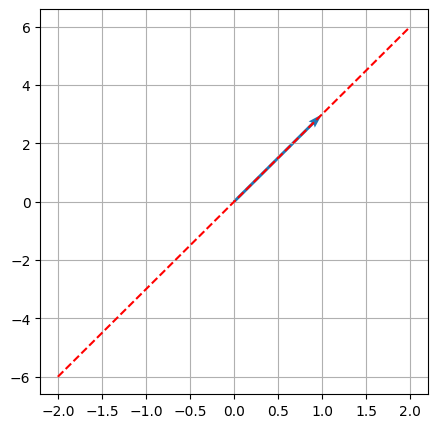

In [8]:
a = np.array([[1,3]]).T
plt.figure(figsize=(5,5))
plt.quiver(0,0,*a,angles='xy',scale_units='xy',scale=1,color='C0')
plt.plot((-2,2),(-6,6),color='r',ls='--')
plt.grid()
plt.show()


Now let's consider a matrix with two columns. Here is the matrix and its column space:

$C\Biggl ( \begin{bmatrix}1&1\\3&2\end{bmatrix}\Biggr) = \lambda_1\begin{bmatrix}1\\3\end{bmatrix}+\lambda_2\begin{bmatrix}1\\2\end{bmatrix}, \lambda\in\mathbb{R}$

We have two columns, so we allow for two distinct $\lambda$s. They are both real-valued, but can be different from each other. What is the set of vector that can be reached by some linear combination of these two column vectors?

The answer: ALL the vectors in $\mathbb{R}^2$. The vector $[-4,3]$ can be obtained by scaling the two columns by $11$ and $-15$ resp. These values were arrived at using the least squares projection method.

Another example is:

$C\Biggl ( \begin{bmatrix}1&3\\2&6\end{bmatrix}\Biggr) = \lambda_1\begin{bmatrix}1\\3\end{bmatrix}+\lambda_2\begin{bmatrix}2\\6\end{bmatrix}, \lambda\in\mathbb{R}$

In this second example, it is not possible to reach any point in $\mathbb{R}^2$ by some linear weighed combination of the two columns. This is because the two vectors are collinear, because one is a scaled version of the other. This means the column space of this $2\times 2$ matrix is a line- a 1D subspace.

Hence, having $N$ columns in a matrix doesn't guarantee that the column space will be $N$-$D$. The dimensionality of the column space equals the number of columns only if the columns form a linearly independent set.

Our final example of column space, is to see what happens when we move in to 3D. Here is the matrix and column space:

$C\Biggl( \begin{bmatrix}3&0\\5&2\\1&2\end{bmatrix}\Biggr) = \lambda_1\begin{bmatrix}1\\5\\1\end{bmatrix}+\lambda_2\begin{bmatrix}0\\2\\2\end{bmatrix}, \lambda\in\mathbb{R}$

Now there are two columns in $\mathbb{R}^3$. Those two columns are linearly indpendent, so the column space of this matrix is 2D, but it's a 2D plane embedded in $\mathbb{R}^3$.

The column space of this matrix is an infinite 2D plane, but that plane is an infinitesimal slice of 3D.

[(-1.0, 6.0), (-1.0, 6.0)]

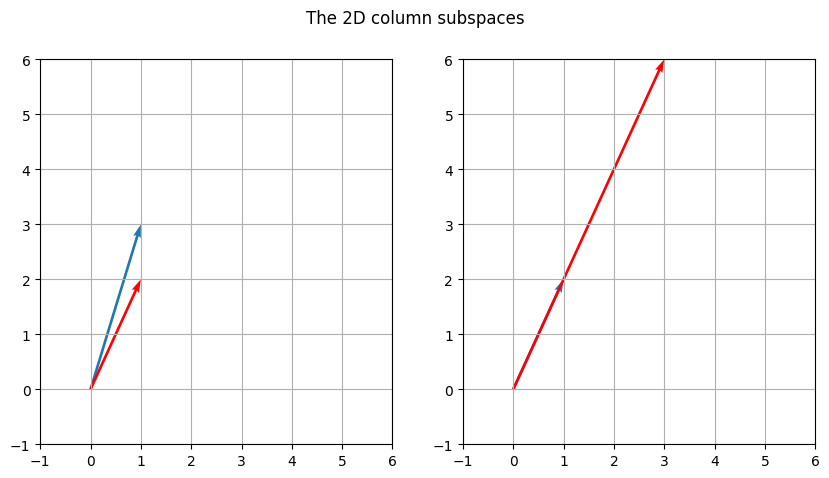

In [24]:
a = np.array([[1,3],[2,6]])
b = np.array([[1,1],[3,2]])

fig,axs = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('The 2D column subspaces')
axs[0].quiver(np.zeros((2)),np.zeros((2)),b[0],b[1],color=['C0','r'],angles='xy',scale_units='xy',scale=1)
axs[0].grid()
axs[0].set(xlim=(-1,6),ylim=(-1,6))

axs[1].quiver(np.zeros((2)),np.zeros((2)),a[0],a[1],color=['C0','r'],angles='xy',scale_units='xy',scale=1)
axs[1].grid()
axs[1].set(xlim=(-1,6),ylim=(-1,6))

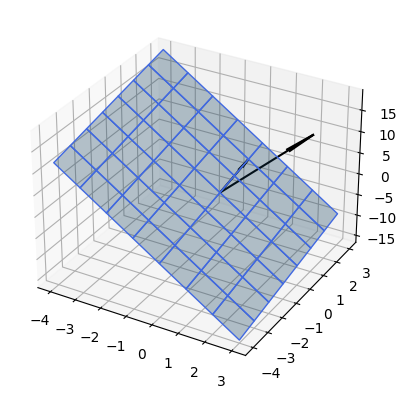

In [35]:
a = np.array([[1,5,1],[0,2,2]]).T
normal = np.cross(a[:,0],a[:,1])

xx,yy = np.meshgrid(np.arange(-4,4),np.arange(-4,4))
z = -(normal[0]*xx+normal[1]*yy)/normal[2]

ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(xx,yy,z, edgecolor='royalblue',alpha=0.3)
ax.quiver(np.zeros(2),np.zeros(2),np.zeros(2),a[0],a[1],a[2],color=['k'])

There are many vectors on that plane (i.e many vectors that can be obtained as linear combination of the two vectors), but many more vectors that are not on the plane.

How can we tell if a vector is in the column space of a matrix? Quantitative methods to determine whether a vector is in the column space of a matrix relies on the concept of matrix rank.

### Row Space
We simply consider all weighted combinations of the rows instead of the columns.

Row space is indicated as $R(\mathbf{A})$. And because the transpose operation swaps rows and column, you can write that the row space of a matrix is the column space of the matrix transposed, in other words, $R(\mathbf{A}) = C(\mathbf{A}^T)$. There are a few differences between the two, like Row space is invariant to row reductions, but column spaces are not.

### Null Spaces
The null space is subtly but importantly different from the column space. The column space can be succintly summarized as the following question:

$\mathbf{A}x = b$

This can be understood as, 'Can we find some set of coefficients in $x$ such that the weighed combination of columns in $\mathbf{A}$ produce vector $b$?' If the answer is yes, then $b\in C(\mathbf{A})$, and vector $x$ tells us how to weigh the columns of $\mathbf{A}$ to get to $b$.

The Null Space in contrast, is summarized as :

$\mathbf{A}y = \mathbf{0}$

This can be translated into english as 'Can we find some set of coefficients in $y$ such that the weighted combination of columns in $\mathbf{A}$ produces the zeros vector $\mathbf{0}$?'

We will not consider the trivial solution, that is, $y= \mathbf{0}$, but are looking for a solution such that the weights in $y$ are not all zeros. Any vector $y$ that can satisfy  this equation is in the null space of $\mathbf{A}$, which we write as $N(\mathbf{A})$

consider:

$\begin{bmatrix}1&-1\\-2&2\end{bmatrix}$

There is an infinite number of vectors $y$ that satisfy $\mathbf{A}y=\mathbf{0}$ for that specific matrix $\mathbf{A}$. And all of those vectors can be expressed as some scaled version of any of these choices. Thus, the null space of this matri can be expressed as:

$N(\mathbf{A}) = \lambda\begin{bmatrix}1\\1\end{bmatrix}, \lambda\in\mathbb{R}$

Here is another matrix; try to find a set of coefficients such that the weighted sum of the columns produced the zeros vector.

$\begin{bmatrix}1&-1\\-2&3\end{bmatrix}$

This matrix has no null space, Formally we say that the null space of this matrix is the empty set: $N(\mathbf{A}) = \emptyset$

There is a tight relationship between the dimensionality of the null space and the linear independence of the columns in a matrix. The null space is empty when the columns of the matrix form a linearly independent set.

**Full-Rank and Full Column Rank matrices have empty null spaces, whereas reduced-rank matrices have nonempty (nontrivial) null spaces**

In [4]:
# To compute the null space of a matrix
A = np.array([ [1,-1],[-2,2] ])
B = np.array([ [1,-1],[-2,3] ])

print( scipy.linalg.null_space(A) )
print( scipy.linalg.null_space(B) )

[[0.70710678]
 [0.70710678]]
[]


The second output is the empty set. Python returned [[0.701,0.701]].T because, given the infinity of possible vectors, Python returned a unit vector . Unit vectors are convenient to work with and have several nice properties, including numerical stability. Therefore computer algorithms typically return unit vector as bases for subspaces.

We plot the row vectors instead of the column vectors, because the row space is orthogonal to the null space. Look at $\mathbf{A}y=\mathbf{0}$. Rewriting the equation for each row of the matrix ($a_i$) leads to the expression $a_i y = \mathbf{0}$; In other words, the dot product between each row and the null space vector is zero.

[(-2.0, 2.0), (-2.0, 2.0)]

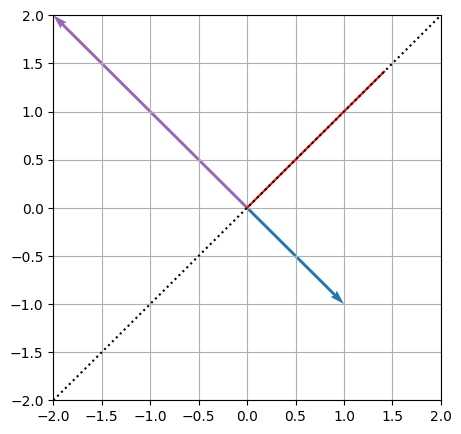

In [18]:
A = np.array([ [1,-1],[-2,2] ])
N = scipy.linalg.null_space(A)

fig,ax = plt.subplots(figsize=(5,5))
ax.quiver(np.zeros(2),np.zeros(2),A[:,0],A[:,1],scale=1,scale_units='xy',angles='xy',color=['C0','C4'])
ax.plot((0,2*N[0,0]),(0,2*N[1,0]),color='r')
ax.plot(N[0]*np.array([-3,3]),N[1]*np.array([-3,3]),ls=':',color='k')
ax.grid()
ax.set(xlim=(-2,2),ylim=(-2,2))

Why do we need null spaces? The null space is the keystone of finding eigenvectors and singular vectors. 

conclusion:<br>
Every matrix has four associated subspaces; we've seen the row,column and null spaces. The fourth is the *right null space* and is the null space of the rows. It's often written as the null space of the matrix transpose: $N(\mathbf{A}^T)$. 

## Rank
*Rank* is a number associated with a matrix. It's related to the dimensionalities of matrix subspaces, and has important implications for matrix operations, including inverting matrices and determining the number of solutions to a system of equations.

A few properties of the rank:
- Rank is a non-negative integer, so a matrix can have a rank of 0,1,2,..., but not -2 or 3.14
- Every matrix has one unique rank; a matrix cannot simultaneously have multiple distinct ranks. (This also means rank is a feature of the matrix, not of the rows or columns)
- The rank of a matrix is indicated using $r(\mathbf{a})$ or $rank(\mathbf{A})$. Also appropriate is '$\mathbf{A}$ is a rank-*r* matrix'.
- The maximum possible rank of a matrix is the smaller of its row or column count.
- A matrix with its maximum possible rank is called a 'full-rank'. A matrix with rank $r<min\{M,N\}$ is variously called 'reduced-rank','rank-deficient' or 'singular'.
- Scalar multiplication does not affect the matrix rank (with the exception of 0, which transforms the matrix into a zeros matrix with rank 0)

There are several equivalent interpretattions and definitons of matrix rank. Those include:
- The largest number of columns (or rows) that form a linearly independent set.
- The dimensionality of the row space (same as that of column space)
- The number of dimensions containing information in the matrix. This is not the same as the total number of columns or rows in the matrix, because of possible linear dependencies.
- The number of nonzero singular values of the matrix.

A question: Is the dimensionality of the column space and the row space the same, even for nonsquare matrices? Yes it is. Here is a visual representation:

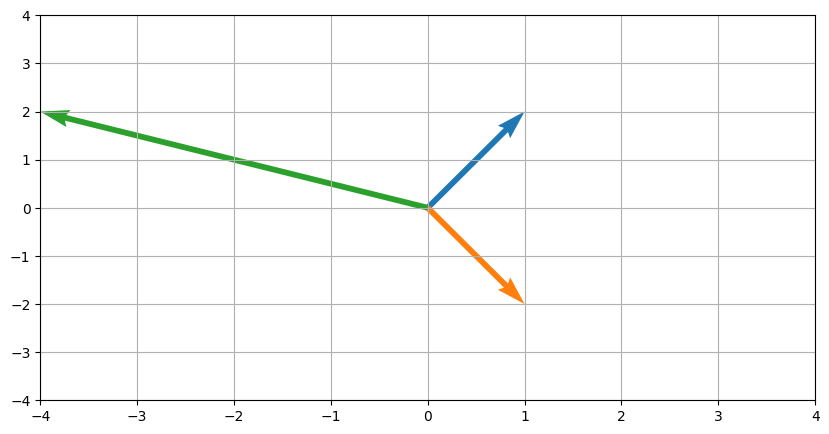

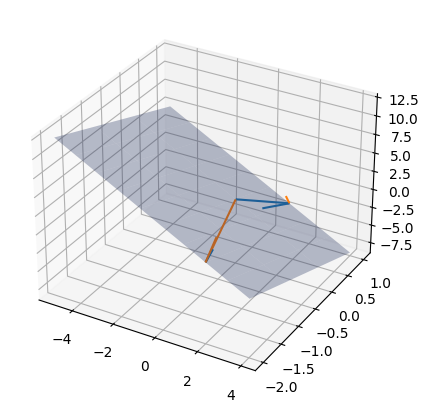

In [36]:
#consider the matrix:
A = np.array([ [1,1,-4],[2,-2,2] ])

#The column space of the matrix is in R^2, and row space is in R^3
# so we will have different plots for their spaces
fig,ax = plt.subplots(figsize=(10,5))
ax.quiver(np.zeros(3),np.zeros(3),A[0,:],A[1,:],scale=1,scale_units='xy',angles='xy',color=['C0','C1','C2'])
ax.set(xlim=(-4,4),ylim=(-4,4))
ax.grid()

normal = np.cross(A[0,:],A[1,:])
xx,yy = np.meshgrid(np.arange(-5,5),np.arange(-2,2))
Z = -(xx*normal[0]+yy*normal[1])/normal[2]
fig2 = plt.figure(figsize=(10,5)).add_subplot(projection='3d')
fig2.quiver(np.zeros(2),np.zeros(2),np.zeros(2),A[:,0],A[:,1],A[:,2],color=['C0','C1'])
fig2.plot_surface(xx,yy,Z,alpha=.3,color='royalblue')

The three columns dont form a linearly independent set, but they do span all of$\mathbb{R}^2$, Therefore the column space of the matrix is 2D. The two rows do form a linearly independent set, and the subspace they span is a 2D plane in $\mathbb{R}^3$.

To be clear, the column space and the row space of the matrix are different, but the dimensionality of those matrix spaces is the same. And the dimensionality is the rank of the matrix, so this matrix has rank of 2.

Guess the ranks of the following matrices:

$A=\begin{bmatrix}1\\2\\4\end{bmatrix},B=\begin{bmatrix}1&3\\2&6\\4&12\end{bmatrix},C=\begin{bmatrix}1&3.1\\2&6\\4&12\end{bmatrix},D=\begin{bmatrix}1&3&2\\6&6&1\\4&2&0\end{bmatrix},E=\begin{bmatrix}1&1&1\\1&1&1\\1&1&1\end{bmatrix},F=\begin{bmatrix}0&0&0\\0&0&0\\0&0&0\end{bmatrix}$

the ranks of the respective matrices are: 
$r(\mathbf{A})=1,r(\mathbf{B})=1,r(\mathbf{C})=2,r(\mathbf{D})=3,r(\mathbf{E})=1,r(\mathbf{F})=0$

visual inspection and some intution are not scalable for computing ranks in practice.
There are methods, for now focus on the idea that rank corresponds to the largest number of columns that can form a linearly independent set, which also corresponds to the dimensionality of the column space of the matrix.

### Ranks of Special Matrices
some special matrices have ranks that are easy to compute or worth learning about:

* Vectors :<br>
  All Vectors have a rank of 1. That's because, by definition, they have only one column or row of information, the subspace they span is 1D. Only exception is the zeros vector.
* Zeros matrices :<br>
   The zeros matrices of any size has a rank of 0
* Identity matrices :<br>
  The rank of the matrix equals the number of rows/columns. In other words, $r(\mathbf{I}_N)=N$. The Identity matrix is a special case of the diagonal matrix.
* Diagonal Matrices :<br>
  The rank of a digonal matrix equals the number of non-zeros diagonal elements. This is because each row contain a maximum of one non-zero element, and it is impossible to create a non-zero number through weighted combination of zeros. This is useful when solving systems of equations and interpreting the singular value decomposition.
* Triangular Matrix :<br>
  A triangular matrix is a full-rank matrix only if there are non-zero values in all diagonal elements. A triangular matrix with at least one zero in the diagoanl will be reduced rank.
* Random Matrices :<br>
The rank of a random matrix is impossible to know apriori, because it depends on the distribution of numbers from which the elements in the matrix were drawn. There is a way to create random matrices with guaranteed maximum possible rank. This is done by drawing floating-point numbers at random, from a Gaussian or uniform distribution.
* Rank-1 Matrices :<br>
A rank-1 matrix has a rank of 1. This means that there is only one column's worth of information in the matrix, and all other columns are simply linear multiples.
Here are examples of rank-1 matrices:

$\begin{bmatrix}-2&-4&-4\\-1&-2&-2\\0&0&0\end{bmatrix},\begin{bmatrix}2&1\\0&0\\2&1\\4&2\end{bmatrix},\begin{bmatrix}12&4&4&12&4\\6&2&2&6&2\\9&3&3&9&3\end{bmatrix}$

Rank-1 matrices can be square, tall or wide; regardless of the size, each column is a scaled copy of the first column( or each row is a scaled copy of the first row).

We can get a rank-1 matrix by taking the outerproduct between two non-zero vectors. 

### Rank of Added and Multiplied Matrices
You can know the rank of $\mathbf{AB}$ or $\mathbf{A+B}$ simply by knowing the ranks of $\mathbf{A}$, or $\mathbf{B}$, but the ranks of the two individual matrices provide upper bounds for the maximum possible rank.

$rank(\mathbf{A}+\mathbf{B}) \leq rank(\mathbf{A})+rank(\mathbf{B})$
<br>
$rank(\mathbf{AB})\leq min\{rank(\mathbf{A}),rank(\mathbf{B})\}$

Points to remember:
* You cannot know the exact rank of a summed or product matrix based on knowing the ranks fo the individual matrices. They only provide upper bounds for the rank of the summed or product matrix.
* The rank of a summed matrix could be greater than the ranks of the individual matrices.
* The rank of a product matrix cannot be greater than the largest rank of the multiplying matrix.

### Rank of Shifted Matrices
Shifted matrices have full rank. One of the primary goals of shifting a square matrix is to increase its rank from $r<M$ to $r=M$.

Consider shifting the zeros matrix by the identity matrix. The rank of the resulting $\mathbf{I}+\mathbf{0}$ matrix is a full-rank matrix.

Cosider: <br>
$\begin{bmatrix}1&3&2\\5&7&2\\2&2&0\end{bmatrix}+.01\begin{bmatrix}1&0&0\\0&1&0\\0&0&1\end{bmatrix}=\begin{bmatrix}1.01&3&2\\5&7.01&2\\2&2&.01\end{bmatrix}$

the leftmost matrix has a rank of 2; But the rank of the summed matrix is 3; The third column can no longer be produced by some linear combination of the other two. Yet the information in the matrix has hardly changed; The Pearson correlation between the elements in the original and the shifted matrix is $\rho = 0.9999$. This has significant implications, in that the rank-2 matrix cannot be inverted, whereas the shifted matrix can.

### SVD
In brief: Every $M\times N$ matrix has a set of  $min\{M,N\}$ non-negative singular values that encode the 'importance' or 'spaciousness' of different directions in the column and row spaces of the matrix. Directions with a singular value of zero are in one of the null spaces.

In practice, computing the matrix rank entails some uncertainty. Computers dont even compute rank, they estimate it to a reasonable degree of accuracy. 

Rank can be computed as the sum of nonzero singular values but that is not what is done in Python. In the `np.linalg.matrix_rank()` function, we have the following:

```
S=svd(M)
return count_nonzero(S>tol)
```

S is vector of singular values, and tol is the tolerance threshold; It is counting numbers greater than some threshold. The exact threshold depends on the matrix values, usually 10-12 orders smaller than the smallest element.

So NumPy actually makes a decisions regarding values that are 'small enough' to be considered effectively zero. The reason is to allow the tolerance to absorb small numerical inaccuracies that may arise due to computer rounding errors, and also allows for ignoring tiny amounts of noise that might contaminate the data-acquisition sensors.

## Rank Applications

### To determine if a vector is in the column space
First we must understand matrix augmentation.<br>
To augment a matrix means to add extra columns to the right hand side of the matrix. You start with the base $M\times N$ matrix and the extra $M\times K$ matrix. The augmented matrix is of size $M\times N+K$. Augmenting two matrices is valid as long as they have the same number of rows.

$\begin{bmatrix}4&5&6\\0&1&2\\9&9&4\end{bmatrix}\sqcup\begin{bmatrix}1\\2\\3\end{bmatrix}=\left [\begin{array}{ccc|c}4&5&6&1\\0&1&2&2\\9&9&4&3\end{array}\right ]$

Now we can determine if a vector is in the column space of a matrix:

1. Augment the matrix with the vector. The original matrix is $\mathbf{A}$ and the augmented matrix is $\tilde{\mathbf{A}}$.
2. Compute the ranks of the two matrices
3. Compare the two ranks. There will be one of two possible outcomes:
   - $rank(\mathbf{A})=rank(\tilde{\mathbf{A}})$ -vector $v$ is in the column space of matrix $\mathbf{A}$.
   - $rank(\mathbf{A})\lt rank(\tilde{\mathbf{A}})$ - vector $v$ is not in the column space of matrix $\mathbf{A}$
  
The logic behind this is that if $v\in C(\mathbf{A})$, then $v$ can be expressed as some linear weighted combination of the columns of $\mathbf{A}$,i.e. the columns of $\tilde{\mathbf{A}}$ form a linearly dependent set. In terms of span, vector $v$ is redundant in $\tilde{\mathbf{A}}$. Hence rank stays the same.

conversely, if $v\notin C(\mathbf{A})$ then $v$ cant be expressed  as a linear weighted combination of the columns of $\mathbf{A}$, which means that $v$ has added new information into $\tilde{\mathbf{A}}$, hence the rank increases by 1.

Determining whether a vector is in the column space is part of the reasoning behind linear least squares modeling, which is the math that underlies ANOVAs, regressions, and general linear models. 

### Linear Independence of a Vector Set
We can put some vectors in to matrix, compute the rank of the matrix, and then compare that rank to the maximum possible rank of that matrix:

The possible outcomes are:
* $r=M$: the vector set is linearly independent
* $r\lt M$: The vector is linearly dependent.

The reasoning is simple- if the rank is smaller than the number of columns, then at least one column can be described as a linear combination of other columns, which is the definiton of linear dependence. If the rank equals the number of columns, thene ach column contributes unique information to the matrix, which means that no column can be described as a linear combination of other columns.

### Determinant
The *determinant* is a number associated with a square matrix. Computing the determinant in practice can be numerically unstable for large matrices, due to underflow and overflow.

The two most important properties of the determinant:
1. It is only defined for the square matrices
2. It is zero for singular (reduced-rank) matrices

The determinant is notated at $det(\mathbf{A})$ or $\lvert A\rvert$. The greek capital $\Delta$ is used when you aren't referring to a specific matrix.

The determinant has a geometric interpretation, which is related to how much the matrix stretches vectors during matrix-vector multiplication. A negative determinant means that one axis is rotated during the transformation.

However, in data science, the determinant is used algebraically;

#### Computing the Determinant
There is a shortcut for calculating the determinant of a $2\times 2$ matrix:

$det\bigg(\begin{bmatrix}a&b\\ c&d\end{bmatrix}\bigg) = \begin{vmatrix}a&b\\ c&d\end{vmatrix}=ad-bc$

The determinant is not limited to integers or positive values. For a real-valued matrix, the determinant will always be a real number.

There is also a visual mnemonic for $3\times 3$ matrices. An important point to note is these shortcuts don't scale up to larger matrices:

$\begin{vmatrix}a&b&c\\ d&e&f\\ g&h&i\end{vmatrix}= aei+bfg+cdh-ceg-bdi-afh$

If you ever need to compute the determinant, simply use 
```
np.linalg.det() #or
scipy.linalg.det()
```

### Determinant with Linear Dependencies
The determinant for a rank-reduced matrix is always zero. Remember that any rank-reduced matrix has at least one column that can be expressed as a linear combination of other columns.

$\begin{vmatrix}a&\lambda a\\ c&\lambda c\end{vmatrix} = ac\lambda-a\lambda c =0$

For the $3\times 3$ matrix:

$\begin{vmatrix}a&b&\lambda a\\ d&e&\lambda d\\ g&h&\lambda g\end{vmatrix} = ae\lambda g+b\lambda dg+\lambda adh-\lambda aeg-bd\lambda g-a\lambda dh =0$

this concept generalizes to higher matrices. Thus all reduced-rank matrices have a determinant of zero. The actual rank doesn't matter; if $r<M$, then $\Delta=0$. All full-rank matrices have a non-zero determinant.

### The Characteristic polynomial
The equation for the determinant of  $2\times 2$ matrix has five quantities: the four elements in the matrix, and the determinant value. The equation is:

$ad-bc = \Delta$. 

We can move quantities around and solve for different variables. Consider the following equations. Assume that $a$,$b$,$c$ and $\delta$ are known, and $\lambda$ is some unknown quantity.

$\begin{vmatrix}a&b\\ c&\lambda\end{vmatrix}=> a\lambda -bc=\Delta$

We can solve for $\lambda$ in terms of other quantities. So if we know the determinant of a matrix, we can solve for unknown variables inside the matrix.

$\begin{vmatrix}2&7\\ 4&\lambda\end{vmatrix} = 4 => 2\lambda-28 = 4=>2\lambda=32=> \lambda=16$

Combining matrix shifting with the determinant is called the *characteristic polynomial* of the matrix.

$det(\mathbf{A}-\lambda\mathbf{I})=\Delta$

It is called a polynomial because the $M\times M$ matrix has $\lambda^M$ term, and therefore has $M$ solutions. For a $2\times 2$ and $3\times 3$ matrices:

$\begin{vmatrix}a-\lambda &b\\ c&d-\lambda\end{vmatrix} = 0=>\lambda^2-(a+d)\lambda+(ad-bc)=0$

$\begin{vmatrix}a-\lambda &b&c\\ d&e-\lambda &f\\ g&h&i-\lambda\end{vmatrix} = 0=>\begin{array} -\lambda ^3+(a+e+i)\lambda ^2 \\ +(-ae+bd-ai+cg-ei+fh)\lambda \\ +aei-afh-bdi+bfg+cdh-ceg\end{array}=0$

The matrix below is full-rank, meaning its determinant is not zero (it is $\Delta=-8$), but we will assume that it has a determinant of 0 after being shifted by some scalar $\lambda$; The question is, what values of $\lambda$ will make this matrix reduced-rank?

We can use the characteristic polynomial to find this out:

$det\Biggl(\begin{bmatrix}1&3\\ 3&1\end{bmatrix}-\lambda\mathbf{I}\Biggr)=0$

$\begin{vmatrix}1-\lambda &3\\ 3&1-\lambda \end{vmatrix}=0 => (1-\lambda )^2-9=0$

$(\lambda+2)(\lambda-4)=0$

The two solutions are $\lambda = -2,4$. When we put them back into the shifted matrix, we get:

$\lambda =-2=>\begin{vmatrix}3&3\\3&3\end{vmatrix}$

$\lambda =4=>\begin{vmatrix}-3&3\\ 3&-3\end{vmatrix}$

Both matrices are of rank-1, and both have nontrivial null spaces, meaning you can find some non-zero vector $y$ such that $(\mathbf{A}-\lambda\mathbf{I})y=\mathbf{0}$.

The characteristic polynomial is very relevant, for one it shows that every square matrix can be expressed as an equation. Also the solutions to the characteristic polynomial set to $\Delta=0$ are the eigenvalues of the matrix (they are the $\lambda s$ we found).